In [1]:
import os, subprocess, time

xvfb_process = subprocess.Popen(
    ["Xvfb", ":99", "-screen", "0", "1024x768x24", "-ac", "+extension", "GLX", "+render", "-noreset"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL
)

# 2. Set the DISPLAY environment variable so RLBench sees it
os.environ["DISPLAY"] = ":99"

In [2]:
!xdpyinfo -display :99 > /dev/null && echo "Display is working" || echo "Display failed"

Display is working


In [1]:
import numpy as np
from rlbench.environment import Environment
from rlbench.action_modes.action_mode import MoveArmThenGripper
from rlbench.action_modes.arm_action_modes import JointVelocity
from rlbench.action_modes.gripper_action_modes import Discrete
from rlbench.tasks import ReachTarget
from rlbench.observation_config import ObservationConfig, CameraConfig


# Initialize action mode
action_mode = MoveArmThenGripper(
    arm_action_mode=JointVelocity(),
    gripper_action_mode=Discrete()
)

obs_config = ObservationConfig()
obs_config.set_all(False)
obs_config.joint_positions = True
obs_config.gripper_open = True
obs_config.task_low_dim_state = True
obs_config.front_camera = CameraConfig(
    rgb=True,
    depth=False,
    point_cloud=False,
    mask=False,
    image_size=(512, 512)
)

# Create and launch environment
print("test1")
env = Environment(
    action_mode, 
    obs_config=obs_config,
    headless=True)
print("test2")
env.launch()
print("test3")

# Load a task
task = env.get_task(ReachTarget)
print("test4")

# Reset the task and get initial observations
descriptions, obs = task.reset()

# Take a random action
print("test5")
obs, reward, terminate = task.step(np.random.normal(size=env.action_shape))

env.shutdown()


test1
test2
test3
test4


This plugin does not support createPlatformOpenGLContext!


Error: signal 11:

/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libcoppeliaSim.so.1(_Z11_segHandleri+0x30)[0x7c361a40eae0]
/usr/lib/x86_64-linux-gnu/libc.so.6(+0x430c0)[0x7c36940110c0]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libQt5Gui.so.5(_ZNK14QOpenGLContext10shareGroupEv+0x0)[0x7c3618c78060]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libQt5Gui.so.5(_ZN16QOpenGLFunctions25initializeOpenGLFunctionsEv+0x4b)[0x7c3618f44a4b]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libQt5Gui.so.5(_ZN24QOpenGLFramebufferObjectC1EiiNS_10AttachmentEjj+0xc8)[0x7c3618f48a18]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libsimExtOpenGL3Renderer.so(_ZN18CFrameBufferObjectC2Eii+0x5a)[0x7c35ba50324a]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libsimExtOpenGL3Renderer.so(_ZN16COpenglOffscreenC1EiiiP14QOpenGLContext+0x72)[0x7c35ba503602]
/opt/CoppeliaSim_Edu_V4_1_0_Ubuntu20_04/libsimExtOpenGL3Renderer.so(_Z21executeRenderCommandsbiPv+0x2550)[0x7c35ba501b90]
/opt/CoppeliaSi

: 

In [2]:
task.variation_count()

20

11


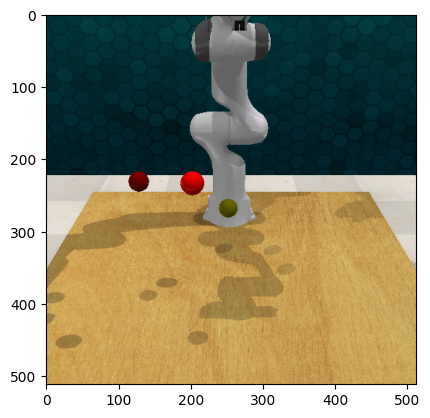

In [30]:
import matplotlib.pyplot as plt

print(obs.get_low_dim_data().shape[0])
plt.imshow(obs.front_rgb)
plt.show()

In [28]:
env.action_shape[0]

np.int64(8)

In [31]:
descriptions

['reach the red target',
 'touch the red ball with the panda gripper',
 'reach the red sphere']

In [33]:
np.uint8(terminate)

np.uint8(0)

In [9]:
import rlbench
import gymnasium as gym


env = gym.make("rlbench/reach_target-vision-v0")

print(env.action_space)
obs, info = env.reset()
obs, reward, terminate, truncate, info = env.step(env.action_space.sample())

env.close()

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'


Box([-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0. ], [0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.04], (8,), float32)
[CoppeliaSim:loadinfo]   done.


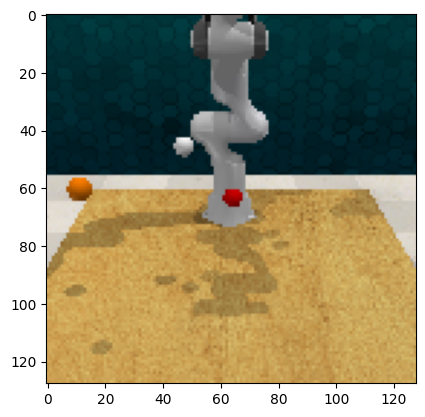

In [11]:
import matplotlib.pyplot as plt


plt.imshow(obs["front_rgb"])

In [1]:
from manipurl.utils.replay_buffer import ReplayBuffer
import numpy as np

replay_buffer = ReplayBuffer(8, 8)

for _ in range(100):
    replay_buffer.insert(np.zeros(8), np.zeros(8), np.zeros(8), 0, 0)

In [2]:
batch = replay_buffer.sample()

In [3]:
print(batch.states.shape)

torch.Size([64, 8])


In [4]:
gamma = 0.99
next_q = np.zeros((64, 1))


print(batch.done.shape)
print(batch.rewards.shape)
print((batch.rewards + gamma * (1 - batch.done) * next_q).shape)

torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([64, 1])


/tmp/ipykernel_140487/1480780003.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print((batch.rewards + gamma * (1 - batch.done) * next_q).shape)
